In [2]:
# Cell 1: Import libraries & basic settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cell 2: Preview dataset
df_raw = pd.read_csv("../data/raw/Exoplanet_dataset.csv")
df_raw.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [ ]:
## Check Raw Dataset Shape (Rows & Columns)
print("✅ Raw Dataset Shape:", df_raw.shape)



✅ Raw Dataset Shape: (3584, 25)


In [ ]:
## Missing Value Analysis – Tabular Report
null_counts = df_raw.isna().sum()
null_percent = (df_raw.isna().sum() / len(df_raw)) * 100

null_report = pd.DataFrame({
    "Null_Count": null_counts,
    "Null_Percentage": null_percent
}).sort_values(by="Null_Percentage", ascending=False)

null_report


,Null_Count,Null_Percentage
AgeGyr,3582,99.944196
LongitudeDeg,3541,98.800223
AscendingNodeDeg,3538,98.716518
PeriastronDeg,3256,90.848214
HostStarAgeGyr,3067,85.574777
InclinationDeg,2919,81.445312
SurfaceTempK,2843,79.324777
Eccentricity,2476,69.084821
PlanetaryMassJpt,2271,63.364955
SemiMajorAxisAU,2178,60.770089


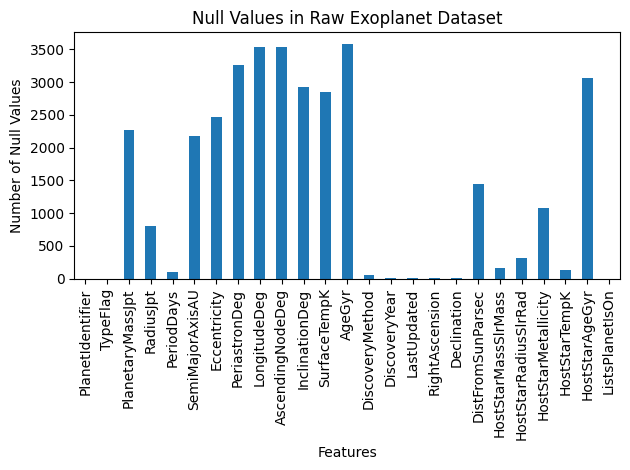

In [ ]:
## Remove Unnecessary and High-Null Columns

plt.figure()
null_counts.plot(kind='bar')
plt.title("Null Values in Raw Exoplanet Dataset")
plt.xlabel("Features")
plt.ylabel("Number of Null Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [11]:
drop_columns = [
    "AgeGyr", "LongitudeDeg", "AscendingNodeDeg", "PeriastronDeg",
    "HostStarAgeGyr", "InclinationDeg",
    "TypeFlag", "PlanetIdentifier", "ListsPlanetIsOn",
    "DiscoveryMethod", "DiscoveryYear", "LastUpdated",
    "RightAscension", "Declination", "DistFromSunParsec"
]

df_clean = df_raw.drop(columns=drop_columns, errors="ignore")
print("✅ Shape After Dropping Columns:", df_clean.shape)


✅ Shape After Dropping Columns: (3584, 10)


## Final Missing Value Imputation – Complete Dataset

In [16]:
impute_cols_1 = [
    "SurfaceTempK",
    "Eccentricity",
    "PlanetaryMassJpt",
    "SemiMajorAxisAU"
]

for col in impute_cols_1:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean[impute_cols_1].isna().sum()



SurfaceTempK        0
Eccentricity        0
PlanetaryMassJpt    0
SemiMajorAxisAU     0
dtype: int64

In [17]:
impute_cols_2 = [
    "RadiusJpt",
    "PeriodDays",
    "HostStarMassSlrMass",
    "HostStarRadiusSlrRad",
    "HostStarMetallicity",
    "HostStarTempK"
]

for col in impute_cols_2:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# ✅ Verify all missing values are handled
df_clean.isna().sum()


PlanetaryMassJpt           0
RadiusJpt                  0
PeriodDays                 0
SemiMajorAxisAU            0
Eccentricity               0
SurfaceTempK               0
HostStarMassSlrMass        0
HostStarRadiusSlrRad       0
HostStarMetallicity        0
HostStarTempK              0
PlanetDensity           3065
HostStarLuminosity       374
dtype: int64

 ## Physics-Based Feature Derivation – Planet Density & Star Luminosity

In [18]:
# ✅ Planet Density
df_clean["PlanetDensity"] = df_clean["PlanetaryMassJpt"] / (df_clean["RadiusJpt"] ** 3)

# ✅ Host Star Luminosity
df_clean["HostStarLuminosity"] = (
    df_clean["HostStarRadiusSlrRad"] ** 2 *
    df_clean["HostStarTempK"] ** 4
)

# ✅ Verify
df_clean[["PlanetDensity", "HostStarLuminosity"]].isna().sum()


PlanetDensity         0
HostStarLuminosity    0
dtype: int64

## Stellar Energy Received by the Planet – Insolation Flux Calculation


In [19]:
df_clean["InsolationFlux"] = df_clean["HostStarLuminosity"] / (df_clean["SemiMajorAxisAU"] ** 2)

df_clean[["InsolationFlux"]].head()


,InsolationFlux
0,3.856534e+16
1,1.094045e+16
2,1.450155e+18
3,2.196685e+16
4,1.235635e+16


## Planetary Surface Temperature Estimation – Equilibrium Temperature

In [20]:
df_clean["EquilibriumTemp"] = df_clean["HostStarTempK"] * np.sqrt(
    df_clean["HostStarRadiusSlrRad"] / (2 * df_clean["SemiMajorAxisAU"])
)

df_clean[["EquilibriumTemp"]].head()


,EquilibriumTemp
0,9909.102099
1,7231.756651
2,24537.970576
3,8608.489549
4,7455.170637


## Final Feature Set Preview and Dataset Summary

In [23]:
# FINAL ROWS & COLUMNS COUNT
# PREVIEW ALL CURRENT COLUMNS
print("CURRENT FEATURE COLUMNS:\n")
for col in df_clean.columns:
    print("•", col)

print("\nDATA PREVIEW (Top 10 Rows):\n")
display(df_clean.head(10))
rows, cols = df_clean.shape

print("\nFINAL DATASET SUMMARY")
print("Total Rows (Samples)     :", rows)
print("Total Columns (Features):", cols)


CURRENT FEATURE COLUMNS:

• PlanetaryMassJpt
• RadiusJpt
• PeriodDays
• SemiMajorAxisAU
• Eccentricity
• SurfaceTempK
• HostStarMassSlrMass
• HostStarRadiusSlrRad
• HostStarMetallicity
• HostStarTempK
• PlanetDensity
• HostStarLuminosity
• InsolationFlux
• EquilibriumTemp

DATA PREVIEW (Top 10 Rows):



,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,SurfaceTempK,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,PlanetDensity,HostStarLuminosity,InsolationFlux,EquilibriumTemp
0,1.0450,0.2096,39.845800,0.2196,0.0370,719.6,0.889,1.362,-0.31,5627.0,113.486044,1.859781e+15,3.856534e+16,9909.102099
1,0.0790,0.2096,102.540000,0.4123,0.0500,719.6,0.889,1.362,-0.31,5627.0,8.579328,1.859781e+15,1.094045e+16,7231.756651
2,0.0014,0.0540,0.176891,0.0048,0.1000,719.6,0.460,0.450,0.00,3584.0,8.890921,3.341158e+13,1.450155e+18,24537.970576
3,0.9400,0.1140,4.194525,0.0390,0.1000,719.6,0.460,0.450,0.00,3584.0,634.473225,3.341158e+13,2.196685e+16,8608.489549
4,0.9400,0.0710,6.356006,0.0520,0.1000,719.6,0.460,0.450,0.00,3584.0,2626.351244,3.341158e+13,1.235635e+16,7455.170637
5,0.2500,0.8400,19.224180,0.1430,0.0626,707.2,1.070,1.020,0.12,5777.0,0.421796,1.158804e+15,5.666798e+16,10909.866514
6,0.1700,0.8200,39.031060,0.2290,0.0684,557.9,1.070,1.020,0.12,5777.0,0.308324,1.158804e+15,2.209728e+16,8621.239587
7,0.0220,0.1470,1.592851,0.0271,0.1000,1601.5,1.070,1.020,0.12,5777.0,6.925812,1.158804e+15,1.577870e+18,25061.254692
8,0.0321,0.2096,5.235400,0.0530,0.0600,719.6,0.690,1.000,0.02,4347.0,3.486031,3.570743e+14,1.271179e+17,13351.704364
9,0.9400,0.1920,18.427946,0.1695,0.1000,719.6,0.830,0.790,-0.01,5132.0,132.807979,4.329131e+14,1.506820e+16,7834.302638



FINAL DATASET SUMMARY
Total Rows (Samples)     : 3584
Total Columns (Features): 14
